# Introduction to Programming :
# ML Group Project Sample
This .ipynb notebook is an excerpt of Group C's submission for the Final Mini Project in AY2019 Trimester 3 IP (Introduction to Programming) Module.  

Students had to work together to collect data of students studying in PSB Academy and to perform data analysis to create a machine learning model trained using the data collected.

### Predicting Retention Rate of Diploma Students in PSB Academy

A survey consisting of 24 questions was conducted among 229 students, to find out their characterstics and traits. 

With this dataset, students were allowed to embark on any topic and implement **supervised machine learning** for a binary **classification** problem. 

Group C chose to predict whether a diploma student studying in PSB Academy would continue to further their education in PSB Academy after graduating from their diploma programme. 

#### Supervised Machine Learning v.s. Unsupervised Machine Learning
In **unsupervised machine learning**, the dataset _does not have_ labelled outputs, and generally these problems are solved through deriving structure from the data based on relationships between the different features of the data.

In **supervised machine learning**, the provided dataset has _labelled_ outputs, and the program will try to generalize a relationship between the _input (features)_ and the _output (target variable)_. 

#### Regression v.s. Classification
Supervised machine learning can be further categorized into regression and classification problems:

In **regression**, the results to be predicted are within a _countinuous_ output (e.g. given various features of a house, predict the value for how much the house would be sold for).

In **classification**, the results to be predicted are within a _discrete_ output (e.g. given various features of an email, predict if the email is a spam email or not).

### Import data

In [1]:
#First, import pandas and matplotlib (they're preinstalled if you downloaded Anaconda!)

#pandas will be used to handle and manipulate the data
import pandas as pd

#matplotlib is used to visualize data through plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline

#Seaborn is also imported for data visualization
import seaborn as sns

In [2]:
psb = pd.read_csv('psb_survey.csv')

#the .head() method will display the first five rows of our dataset
psb.head()

,Timestamp,Average Grade,Birth Year,Nationality,Gender,Favorite Pastime,Favorite Music Genre,Favorite Sport,Favorite Flavor Type,Personality,...,Aptitude to work in groups,Do you Procrastinate a lot?,Are you organized?,Do you have Siblings? How many?,Monthly Spending,Course After Diploma,Enjoyment of Studying in Singapore,Enjoyment of Studying in PSB Academy,Favorite DICT Module,Hardest DICT Module
0,2019/08/15 10:43:12 PM GMT+8,9,2000,Singaporean,Female,Games,EDM,Hockey,Sweet,1,...,4,Yes,No,0,700,PSB University of Newcastle,1,4,AC,ICOS
1,2019/08/15 10:44:11 PM GMT+8,7,2000,Malaysian,Female,Physical Sports,Jazz,Tennis,Sweet,3,...,5,No,Yes,3,600,PSB Edith Cowan University,5,9,IP,IP
2,2019/08/15 10:47:11 PM GMT+8,8,1998,Singaporean,Male,Physical Sports,EDM,Football,Sweet,4,...,7,Yes,Yes,3,400$,PSB University of Newcastle,8,7,ISOG,IP
3,2019/08/15 10:51:36 PM GMT+8,9,1998,Singaporean,Female,Hanging out with friends outside,Rock,Hockey,Sour,2,...,5,Yes,No,1,$300,PSB University of Newcastle,10,6,DDMG,IP
4,2019/08/15 10:59:56 PM GMT+8,5,1999,Indian,Female,Hanging out with friends outside,Rock,Basketball,Sweet,3,...,7,No,Yes,1,100 $ pr month,PSB University of Newcastle,1,1,ISEG,INTRODUCTION TO PROGRAMMING


In [3]:
#.shape will output (number of rows, number of columns)
psb.shape

(230, 25)

In [4]:
#.columns will ouput the labels for our columns
psb.columns

Index(['Timestamp', 'Average Grade', 'Birth Year', 'Nationality', 'Gender',
       'Favorite Pastime', 'Favorite Music Genre', 'Favorite Sport',
       'Favorite Flavor Type', 'Personality', 'Typical Sleeping Hour',
       'Do you smoke?', 'Favorite Color', 'Favorite Digit', 'Horoscope',
       'Aptitude to work in groups', 'Do you Procrastinate a lot?',
       'Are you organized?', 'Do you have Siblings? How many?',
       'Monthly Spending', 'Course After Diploma',
       'Enjoyment of Studying in Singapore',
       'Enjoyment of Studying in PSB Academy', 'Favorite DICT Module',
       'Hardest DICT Module'],
      dtype='object')

In [5]:
#Here, we rename the column names
psb.columns=['Time','Grade','BirthYear','Nationality','Gender','Pastime',
             'FavMusic','FavSport','FavFlavor','Personality','HrSleep',
             'Smoker','FavColor','FavDigit','Horoscope','Aptitude',
             'Procrastine','Organized','NoSib','MonthlySpending','Course',
             'LikeSingapore','LikePSB','FavModule','HardestModule']

#Running .head() again will show us that the column names have indeed changed
psb.head()

,Time,Grade,BirthYear,Nationality,Gender,Pastime,FavMusic,FavSport,FavFlavor,Personality,...,Aptitude,Procrastine,Organized,NoSib,MonthlySpending,Course,LikeSingapore,LikePSB,FavModule,HardestModule
0,2019/08/15 10:43:12 PM GMT+8,9,2000,Singaporean,Female,Games,EDM,Hockey,Sweet,1,...,4,Yes,No,0,700,PSB University of Newcastle,1,4,AC,ICOS
1,2019/08/15 10:44:11 PM GMT+8,7,2000,Malaysian,Female,Physical Sports,Jazz,Tennis,Sweet,3,...,5,No,Yes,3,600,PSB Edith Cowan University,5,9,IP,IP
2,2019/08/15 10:47:11 PM GMT+8,8,1998,Singaporean,Male,Physical Sports,EDM,Football,Sweet,4,...,7,Yes,Yes,3,400$,PSB University of Newcastle,8,7,ISOG,IP
3,2019/08/15 10:51:36 PM GMT+8,9,1998,Singaporean,Female,Hanging out with friends outside,Rock,Hockey,Sour,2,...,5,Yes,No,1,$300,PSB University of Newcastle,10,6,DDMG,IP
4,2019/08/15 10:59:56 PM GMT+8,5,1999,Indian,Female,Hanging out with friends outside,Rock,Basketball,Sweet,3,...,7,No,Yes,1,100 $ pr month,PSB University of Newcastle,1,1,ISEG,INTRODUCTION TO PROGRAMMING


In [6]:
#Group C dropped the columns that are unlikely to affect the prediction
psb= psb.drop(columns = ["Time", "BirthYear", "Gender", "Pastime", "FavMusic",
                          "FavSport", "FavFlavor", "HrSleep", "MonthlySpending",
                          "FavModule", "HardestModule", "Smoker", "FavColor",
                          "FavDigit", "Horoscope", "Procrastine", "Organized"])

#This will output the remaining columns to be used as the features
psb.columns

Index(['Grade', 'Nationality', 'Personality', 'Aptitude', 'NoSib', 'Course',
       'LikeSingapore', 'LikePSB'],
      dtype='object')

In [7]:
psb.head()

,Grade,Nationality,Personality,Aptitude,NoSib,Course,LikeSingapore,LikePSB
0,9,Singaporean,1,4,0,PSB University of Newcastle,1,4
1,7,Malaysian,3,5,3,PSB Edith Cowan University,5,9
2,8,Singaporean,4,7,3,PSB University of Newcastle,8,7
3,9,Singaporean,2,5,1,PSB University of Newcastle,10,6
4,5,Indian,3,7,1,PSB University of Newcastle,1,1


### Nationality

In [8]:
#.value_counts() on the 'Nationality' column will output the number of each nationalities who responded to the survey
psb['Nationality'].value_counts()

Singaporean    61
Korean         51
Malaysian      32
Indonesian     31
Burmese        14
Indian         12
Chinese         8
Indian          5
indian          2
China           2
Vietnamese      2
Australian      1
Srilankan       1
chinese         1
vietnam         1
filipino        1
Thai            1
Saudi Arab      1
Bangladesh      1
Chinese         1
Taiwanese       1
Name: Nationality, dtype: int64

In [9]:
#Group C decided to sort the Nationalities according to if they are a local student or a student from outside of Singapore

#In the following code, a new column named 'Singaporean' will be created

#Singaporeans are represented as 1 in the column
psb.loc[psb['Nationality'].str.contains('Singaporean'),"Singaporean"]=1

#Non-Singaporeans are represented as 0 in the column
psb.loc[psb['Nationality']!='Singaporean',"Singaporean"]=0

#The column for 'Nationaility' will no longer be needed and hence will be dropped
psb = psb.drop(columns = ['Nationality'])
psb.head()

,Grade,Personality,Aptitude,NoSib,Course,LikeSingapore,LikePSB,Singaporean
0,9,1,4,0,PSB University of Newcastle,1,4,1.0
1,7,3,5,3,PSB Edith Cowan University,5,9,0.0
2,8,4,7,3,PSB University of Newcastle,8,7,1.0
3,9,2,5,1,PSB University of Newcastle,10,6,1.0
4,5,3,7,1,PSB University of Newcastle,1,1,0.0


### Course

In [10]:
#.value_counts() here is used for the 'Course' column instead of the 'Nationalities' column
psb['Course'].value_counts()

PSB University of Newcastle       74
PSB Coventry University           59
PSB Edith Cowan University        27
No Further Studies                22
Other institution Overseas        21
Other Institution in Singapore    17
PSB UOW                            1
I will become an entrepreneur      1
Latrobe University in PSB          1
Not in Singapore                   1
Or some other idk                  1
UOW                                1
Going back to korea😥               1
University in Malaysia             1
Work first for school income       1
PSB Edinbrugh                      1
Name: Course, dtype: int64

In [11]:
#A new column named 'psbCourse' will be created in the following code

#Students who will continue to study in PSB Academy will be represented as 1
psb.loc[psb['Course'].str.contains('PSB'),"psbCourse"]=1

#The remaining students will be represented as 0 
psb['psbCourse'].fillna(0,inplace=True)

#The column for 'Course' will no longer be needed and hence will be dropped
psb = psb.drop(columns = ["Course"])

psb.head()

,Grade,Personality,Aptitude,NoSib,LikeSingapore,LikePSB,Singaporean,psbCourse
0,9,1,4,0,1,4,1.0,1.0
1,7,3,5,3,5,9,0.0,1.0
2,8,4,7,3,8,7,1.0,1.0
3,9,2,5,1,10,6,1.0,1.0
4,5,3,7,1,1,1,0.0,1.0


### NoSib

In [12]:
#In this cell, a 'noSib' column will be created 

#Students with no siblings are represented with a 1
psb.loc[psb['NoSib'] ==0,'noSib']=1

#Students with siblings are 0
psb.loc[psb['NoSib'] !=0,'noSib']=0

#The original "NoSib" (No. of Siblings) columns will be dropped
psb = psb.drop(columns = ['NoSib'])

psb.head()

,Grade,Personality,Aptitude,LikeSingapore,LikePSB,Singaporean,psbCourse,noSib
0,9,1,4,1,4,1.0,1.0,1.0
1,7,3,5,5,9,0.0,1.0,0.0
2,8,4,7,8,7,1.0,1.0,0.0
3,9,2,5,10,6,1.0,1.0,0.0
4,5,3,7,1,1,0.0,1.0,0.0


### Data Visualization

##### Barplot of Students (Singaporean)

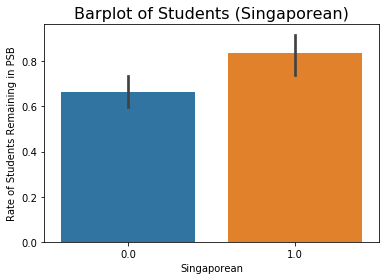

,Singaporean,psbCourse
1,1.0,0.836066
0,0.0,0.662722


In [13]:
sns.barplot(x='Singaporean', y='psbCourse', data=psb)
plt.ylabel('Rate of Students Remaining in PSB')
plt.title('Barplot of Students (Singaporean)', fontsize=16)
plt.show()

psb[['Singaporean', 'psbCourse']].groupby(['Singaporean'], as_index=False).mean().sort_values(by='psbCourse', ascending=False)

#0.0 = non-Singaporean
#1.0 = Singaporean

#From this, we can see that SG students are more likely to continue studying
#in PSB Academy

##### Barplot of Students (noSib)

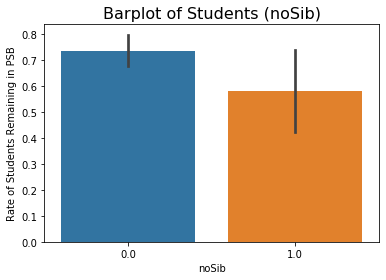

,noSib,psbCourse
0,0.0,0.734375
1,1.0,0.578947


In [14]:
sns.barplot(x='noSib', y='psbCourse', data=psb)
plt.ylabel('Rate of Students Remaining in PSB')
plt.title('Barplot of Students (noSib)', fontsize=16)

plt.show()
psb[["noSib", "psbCourse"]].groupby(['noSib'], as_index=False).mean().sort_values(by='psbCourse', ascending=False)

#0.0 = student has siblings
#1.0 = student has NO siblings

#Students with siblings are more likely to continue their education with PSB

###### Barplot of Students (Grade)

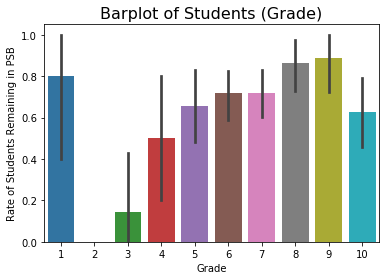

,Grade,psbCourse
9,10,0.625000
8,9,0.888889
7,8,0.864865
6,7,0.716981
5,6,0.717391
4,5,0.655172
3,4,0.500000
2,3,0.142857
1,2,0.000000
0,1,0.800000


In [15]:
sns.barplot(x='Grade', y='psbCourse', data=psb)
plt.ylabel('Rate of Students Remaining in PSB')
plt.title('Barplot of Students (Grade)', fontsize=16)

plt.show()
psb[["Grade", "psbCourse"]].groupby(['Grade'], as_index=False).mean().sort_values(by='Grade', ascending=False)

#1 indicates a low perceived grade by the student
#10 indicates a high perceived grade by the student

#Based on the .value_counts() in the next cell,
#We could assume that the high rate of students who answered "1" 
    #could be outliers, due to the low number of students who answered "1"
    #(only 5 students answered "1")
    #(e.g. if only 1 student answered "1" and is going to continue
    #their education in PSB, the rate would be high at 1.0)
    
#Hence, we can say that as the students' perceived grades increase,
#they would be more likely to further their education in PSB Academy

#However for students who feel that their grades are very high (10), 
#they might be less likely to continue studying in PSB Academy after graduating

#This data is important as it shows that the school needs to come up with
#a suitable curriculum that is not too easy/difficult to the students

In [16]:
psb['Grade'].value_counts()

7     53
6     46
8     37
5     29
10    24
9     18
4     10
3      7
1      5
2      1
Name: Grade, dtype: int64

##### Barplot of Students (Personality)

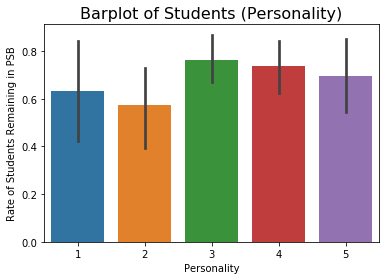

,Personality,psbCourse
4,5,0.696970
3,4,0.739130
2,3,0.763158
1,2,0.575758
0,1,0.631579


In [17]:
sns.barplot(x='Personality', y='psbCourse', data=psb)
plt.ylabel('Rate of Students Remaining in PSB')
plt.title('Barplot of Students (Personality)', fontsize=16)

plt.show()
psb[["Personality", "psbCourse"]].groupby(['Personality'], as_index=False).mean().sort_values(by='Personality', ascending=False)

#Students who answered "1" are more introverted
#Students who answered "5" are more extroverted

In [18]:
psb['Personality'].value_counts()

3    76
4    69
5    33
2    33
1    19
Name: Personality, dtype: int64

##### Barplot of Students (Aptitude)

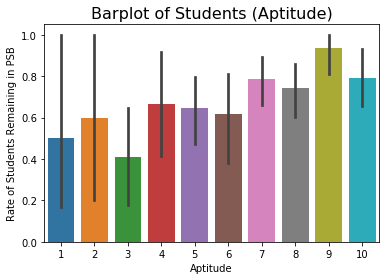

,Aptitude,psbCourse
9,10,0.793103
8,9,0.937500
7,8,0.744186
6,7,0.787234
5,6,0.619048
4,5,0.647059
3,4,0.666667
2,3,0.411765
1,2,0.600000
0,1,0.500000


In [19]:
sns.barplot(x='Aptitude', y='psbCourse', data=psb)
plt.ylabel('Rate of Students Remaining in PSB')
plt.title('Barplot of Students (Aptitude)', fontsize=16)

plt.show()
psb[["Aptitude", "psbCourse"]].groupby(['Aptitude'], as_index=False).mean().sort_values(by='Aptitude', ascending=False)

#Students who answered "10" have a higher aptitude to work in groups
#Students who answered "1" have a lower aptitude to work in group

##### Barplot of Students (LikeSingapore)

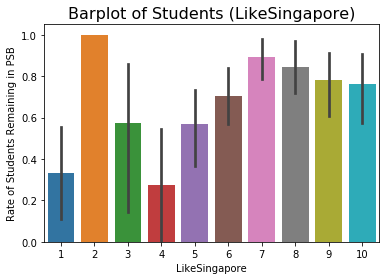

,LikeSingapore,psbCourse
9,10,0.761905
8,9,0.782609
7,8,0.843750
6,7,0.893617
5,6,0.702703
4,5,0.566667
3,4,0.272727
2,3,0.571429
1,2,1.000000
0,1,0.333333


In [20]:
sns.barplot(x='LikeSingapore', y='psbCourse', data=psb)
plt.ylabel('Rate of Students Remaining in PSB')
plt.title('Barplot of Students (LikeSingapore)', fontsize=16)

plt.show()
psb[["LikeSingapore", "psbCourse"]].groupby(['LikeSingapore'], as_index=False).mean().sort_values(by='LikeSingapore', ascending=False)

#1 is the least
#10 is the most

In [21]:
psb['LikeSingapore'].value_counts()

7     47
6     37
8     32
5     30
9     23
10    21
1     18
4     11
3      7
2      4
Name: LikeSingapore, dtype: int64

##### Barplot of Students (LikePSB)

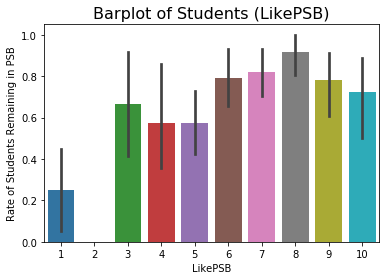

,LikePSB,psbCourse
9,10,0.722222
8,9,0.782609
7,8,0.916667
6,7,0.818182
5,6,0.793103
4,5,0.575758
3,4,0.571429
2,3,0.666667
1,2,0.000000
0,1,0.250000


In [22]:
sns.barplot(x='LikePSB', y='psbCourse', data=psb)
plt.ylabel('Rate of Students Remaining in PSB')
plt.title('Barplot of Students (LikePSB)', fontsize=16)

plt.show()
psb[["LikePSB", "psbCourse"]].groupby(['LikePSB'], as_index=False).mean().sort_values(by='LikePSB', ascending=False)

### Split data into train/validation/test sets

It is possible to fit a model to our dataset and test for its accuracy (how many predictions did it get right), but [overfitting](https://www.youtube.com/watch?v=sJgPnuiHrs8) may occur which leads to inaccuracies. 

Therefore, we will split our dataset into three sets: [a training set, a cross-validation set, and a test set.](https://www.codecademy.com/articles/training-set-vs-validation-set-vs-test-set)

We will fit our model to the **training set**, then use the **validation set** to evaluate the model we created and tune our hyperparameters accordingly. Finally, we the **test set** will be used to provide a final evaluation of our model. 

In [23]:
#scikit-learn(sklearn) will be used to split our dataset 

#here, the dataset is split as such:
#training set: 60%
#cross-validation set: 20%
#test set: 20%

from sklearn.model_selection import train_test_split
features = psb.drop(columns='psbCourse')
labels = psb['psbCourse']

#the code below splits the dataset into a training set (60%) and test set (40%)
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size = 0.4, 
                                                    random_state = 22)

#the code below further splits the test set into half,
#resulting in a final training (60%), validation (20%), test(20%) split
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, 
                                                test_size = 0.5, 
                                                random_state = 22)

### Fit model and tune hyperparameters

For the project, students were introduced to 5 different ML algorithms:
* Logistic Regression
* Support Vector Machine
* Multi-layer Perceptron
* Random Forest
* Gradient Boosting

The following code features the [Logistic Regression](https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python) algorithm. 

([Official sklearn.linear_model.LogisticRegression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

Despite its name, logistic regression can be used to solve classification problems!

It is a good algorithm to be used when the target variable has a binary value (e.g. 0 or 1, Yes or No).

![Image of Brief overview on how Logistic Regression works](https://i.imgur.com/OkHaGyh.png)
(Image from Applied Machine Learning: Algorithms, Derek Jedamski)

In [24]:
#joblib will later be used to pickle our model to be saved for further use
import joblib

#scikit-learn (sklearn) will provide the algorithms to be used
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [25]:
#the function defined in this cell will be called in the next cell
def print_results(results):
    
    #output the best hyperparameters
    print(f'Best parameters: {results.best_params_}\n')
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    
    for mean, std, param in zip(means, stds, params):
        print(f'{round(mean,3)} (+/-{round(std *2,3)}) for {param}')

The C hyperparameter is the inverse regularization parameter to control how closely the model fits to the training data. Regularization is used to reduce overfitting in the machine learning models. 

**High** values of C results in a highly complex model, where there is low regularization and the model is more likely to overfit. 

On the other hand, **low** values of C will result in a less complex model, with high regularization, and the model is more likely to underfit.

The following code will find a suitable value of C to be used in the model:

In [26]:
lr = LogisticRegression()

parameters_lr = {
    'C': [0.0001, 0.001, 0.01, 0.1]
}

cv_lr = GridSearchCV(lr, parameters_lr, cv=2)
cv_lr.fit(X_train, y_train.values.ravel())

print_results(cv_lr)

Best parameters: {'C': 0.0001}

0.703 (+/-0.006) for {'C': 0.0001}
0.703 (+/-0.006) for {'C': 0.001}
0.703 (+/-0.006) for {'C': 0.01}
0.667 (+/-0.019) for {'C': 0.1}


In [27]:
cv_lr.best_estimator_

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
joblib.dump(cv_lr.best_estimator_, 'LR_psbmodel.pkl')

['LR_psbmodel.pkl']

### Evaluate on validation and test set

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

In [30]:
models = {}

models['LR'] = joblib.load('LR_psbmodel.pkl')

In [31]:
def evaluate_model(name,model,features,labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels,pred),3)
    precision = round(precision_score(labels,pred),3)
    recall = round(recall_score(labels,pred),3)
    print(f'{name} -- Accuracy: {accuracy} / Precision: {precision} / Recall: {recall}')

**Evaluation metrics**: [Accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy) v.s. [Precision and Recall](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)

In [32]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_val, y_val)

LR -- Accuracy: 0.696 / Precision: 0.696 / Recall: 1.0


In [33]:
evaluate_model('LR', models['LR'], X_test, y_test)

LR -- Accuracy: 0.739 / Precision: 0.739 / Recall: 1.0


### Additional notes

PSB Academy's SCS Student Chapter consists of 3 Focus Groups: 
* AI (Artificial Intelligence) Focus Group
* Cybersecurity Focus Group
* Design Thinking Focus Group

Each Focus Group runs weekly peer-learning sessions to share more about their respective topics to interested students. 
***
If you are interested in AI and would like to learn more about Machine Learning, below are some links to resources to help you get started in your Machine Learning journey!

* **Machine Learning Crash Course, Google**- https://developers.google.com/machine-learning/crash-course
<br><br>
* **Stanford Machine Learning, Coursera**- https://www.coursera.org/learn/machine-learning
    * Coursework can be audited for free. You can also apply for financial aid to receive the certification for free. 
<br><br>
* **Intel AI Academy**- https://makerspace.aisingapore.org/courses/intel-ai-academy/
<br><br>
* **Titanic: ML from Disaster, Kaggle**- https://www.kaggle.com/c/titanic
<br><br>
* **Applied Machine Learning: Algorithms** (requires Lynda.com/LinkedIn learning subscription): https://www.lynda.com/Python-tutorials/Applied-Machine-Learning-Algorithms/806167-2.html